Дипломная работа по теме: “Анализ данных о сердечно-сосудистых заболеваниях (поиск инсайтов, составление рекомендаций стейкхолдерам, построение предиктивной модели классификации наличия заболевания)”

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('cardio_train.csv', sep = ';')
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


id - номер пациента

age - возраст пациента в днях

gender - пол пациента (1 - женщина, 2 - мужчина)

height - рост пациента (в см)

weight - вес пациента (в см)

ap_hi - систолическое давление пациента

ap_lo - диастолическое давление пациента

cholesterol - уровень холестерина (1 - нормальный, 2 - выше нормы, 3 - повышенный)

gluc - уровень глюкозы  (1 - нормальный, 2 - выше нормы, 3 - повышенный)

smoke - курение (0 - не курит, 1 - курит)

alco - употребление алкоголя (0 - не пьет, 1 - пьет)

active - физическая активность (0 - нет, 1 - да)

cardio - наличие заболевания (0 - нет, 1 - да)

In [ ]:
df['age'] = (df['age'] / 365.25).round(0).astype(int)

In [ ]:
df = df.drop('id', axis = 1)
df.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0
5,60,1,151,67.0,120,80,2,2,0,0,0,0
6,61,1,157,93.0,130,80,3,1,0,0,1,0
7,62,2,178,95.0,130,90,3,3,0,0,1,1
8,48,1,158,71.0,110,70,1,1,0,0,1,0
9,54,1,164,68.0,110,60,1,1,0,0,0,0


In [ ]:
df = df.rename(columns={'ap_hi': 'systolic_blood_pressure'})
df = df.rename(columns={'ap_lo': 'diastolic_blood_pressure'})
df = df.rename(columns={'gluc': 'glucose'})
df = df.rename(columns={'alco': 'alcohol'})
df = df.rename(columns={'active': 'physically_active'})
df = df.rename(columns={'cardio': 'cardio_disease'})
df.head(10)

,age,gender,height,weight,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,glucose,smoke,alcohol,physically_active,cardio_disease
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0
5,60,1,151,67.0,120,80,2,2,0,0,0,0
6,61,1,157,93.0,130,80,3,1,0,0,1,0
7,62,2,178,95.0,130,90,3,3,0,0,1,1
8,48,1,158,71.0,110,70,1,1,0,0,1,0
9,54,1,164,68.0,110,60,1,1,0,0,0,0


In [ ]:
df.describe()

,age,gender,height,weight,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,glucose,smoke,alcohol,physically_active,cardio_disease
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.303157,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.760171,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<Axes: ylabel='age'>

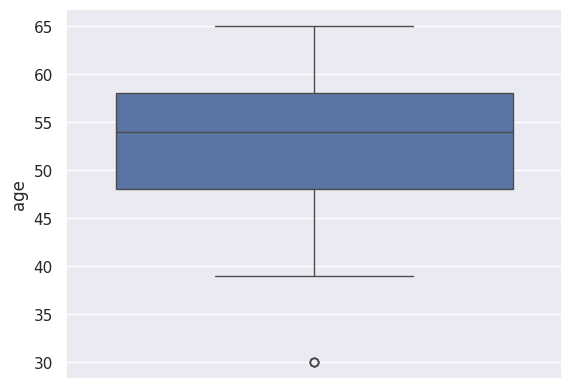

In [ ]:
sns.boxplot(df['age'])

<Axes: ylabel='height'>

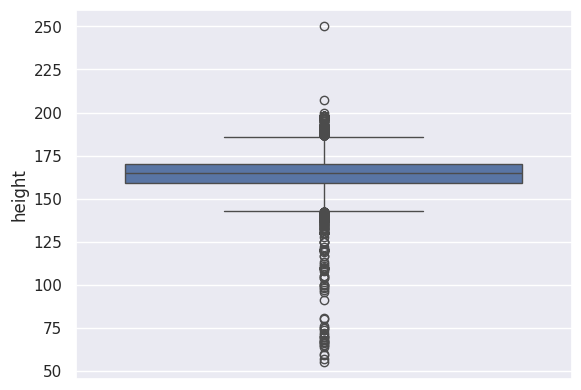

In [ ]:
sns.boxplot(df['height'])

<Axes: ylabel='weight'>

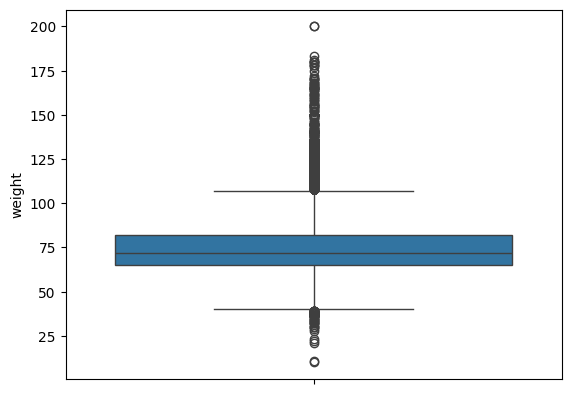

In [ ]:
sns.boxplot(df['weight'])

<Axes: ylabel='systolic_blood_pressure'>

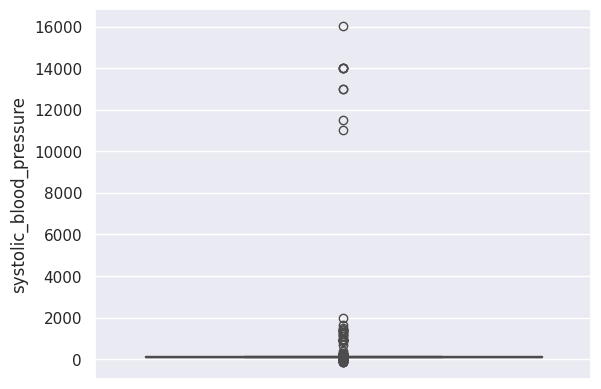

In [ ]:
sns.boxplot(df['systolic_blood_pressure'])

<Axes: ylabel='diastolic_blood_pressure'>

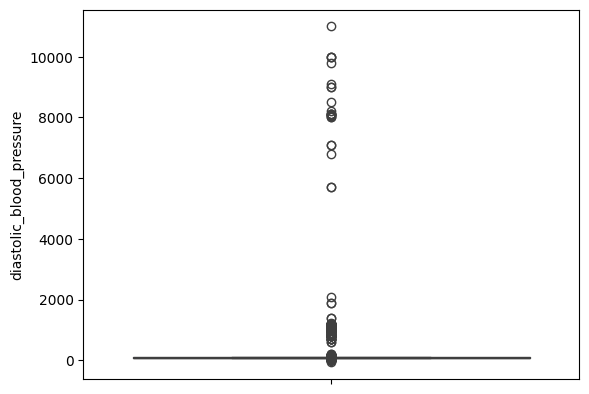

In [ ]:
sns.boxplot(df['diastolic_blood_pressure'])

In [ ]:
def outliers_indices(feature):
  #Избавляемся от выбросов. Находим среднее значение признака и стандартное отклонение.
  #Выбросами будем считать значения, которые выходят за пределы трёх сигм.
    mid = df[feature].mean()
    sigma = df[feature].std()
    return df[(df[feature] < mid - 3*sigma) | (df[feature] > mid + 3*sigma)].index

In [ ]:
wrong_height = outliers_indices('height')
wrong_weight = outliers_indices('weight')
wrong_sbp = outliers_indices('systolic_blood_pressure')
wrong_dbp = outliers_indices('diastolic_blood_pressure')

out = set(wrong_height) | set(wrong_weight) | set(wrong_sbp) | set(wrong_dbp)

print(len(out))

1929


In [ ]:
df.drop(out, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68071 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       68071 non-null  int64  
 1   gender                    68071 non-null  int64  
 2   height                    68071 non-null  int64  
 3   weight                    68071 non-null  float64
 4   systolic_blood_pressure   68071 non-null  int64  
 5   diastolic_blood_pressure  68071 non-null  int64  
 6   cholesterol               68071 non-null  int64  
 7   glucose                   68071 non-null  int64  
 8   smoke                     68071 non-null  int64  
 9   alcohol                   68071 non-null  int64  
 10  physically_active         68071 non-null  int64  
 11  cardio_disease            68071 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.8 MB


In [ ]:
df.groupby('gender')['height'].mean()

,height
gender,
1,161.439898
2,169.885523


In [ ]:
df.groupby('gender')['weight'].mean()

,weight
gender,
1,71.998956
2,76.511896


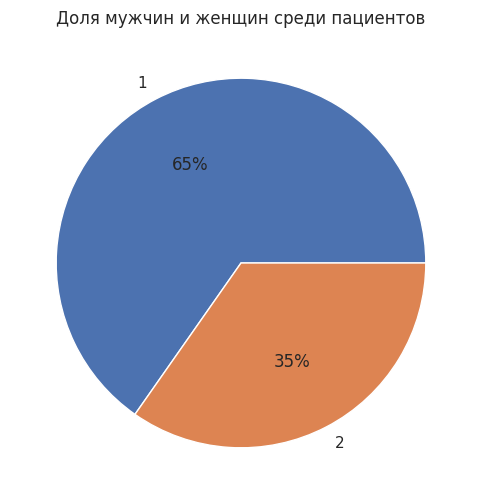

In [ ]:
plt.figure(figsize=(6,6))
ax = df.gender.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Доля мужчин и женщин среди пациентов')
plt.ylabel('')
plt.show()

Доля женщин среди пациентов гораздо больше мужчин - 65% против 35%

In [ ]:
df.cardio_disease.value_counts(normalize=True)

,proportion
cardio_disease,
0,0.507162
1,0.492838


Процентное соотношение пациентов с ССЗ приблизительно равно процентному соотношению без ССЗ

In [ ]:
df.groupby('cardio_disease')['age'].mean()

,age
cardio_disease,
0,51.684935
1,54.954990


Средний возраст пациентов с наличием ССЗ на 3 года выше, чем у здоровых пациентов и составляет 55 лет

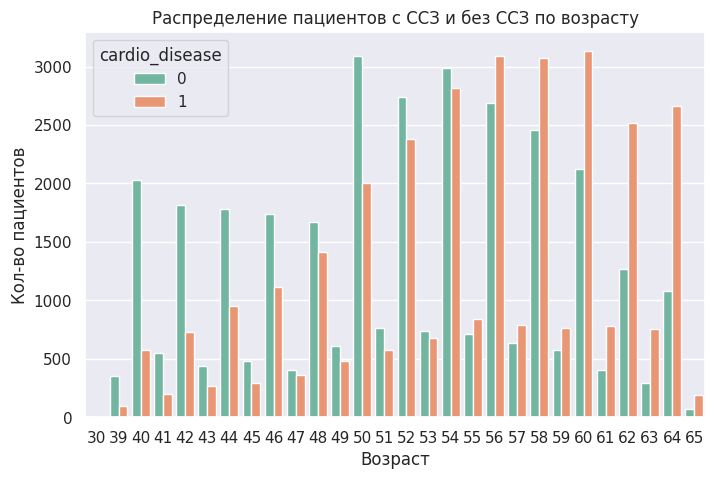

In [ ]:
rcParams['figure.figsize'] = 8, 5
sns.countplot(x='age', hue='cardio_disease', data = df, palette="Set2")
plt.title('Распределение пациентов с ССЗ и без ССЗ по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Кол-во пациентов')
plt.show()

Среди возрастных людей (старше 55 лет) гораздо больше больных. Чем выше возраст, тем больше пациентов с ССЗ

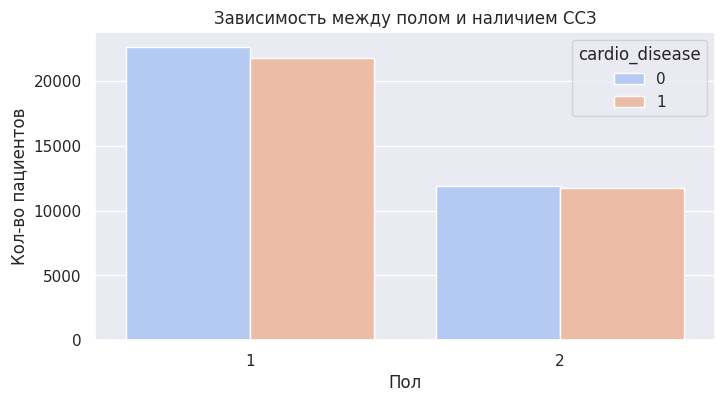

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, hue='cardio_disease', x='gender', palette='coolwarm')
plt.title('Зависимость между полом и наличием ССЗ')
plt.xlabel('Пол')
plt.ylabel('Кол-во пациентов')
plt.show()

Частота наличия ССЗ среди женщин чуть выше чем среди мужчин

In [ ]:
pd.crosstab(df.physically_active,df.cardio_disease)

cardio_disease,0,1
physically_active,,
0,6267,7093
1,28256,26455


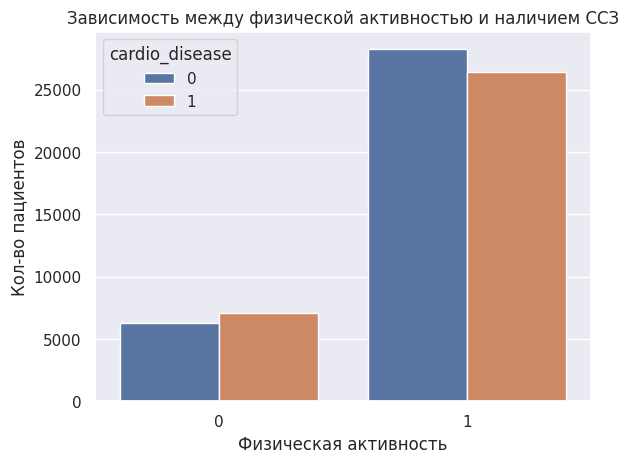

In [ ]:
sns.countplot(x='physically_active', hue='cardio_disease', data=df)
plt.title('Зависимость между физической активностью и наличием ССЗ')
plt.xlabel('Физическая активность')
plt.ylabel('Кол-во пациентов')
plt.show()

Среди пациентов, занимающихся физической активностью, было выявлено почти в 4 раза больше случаев ССЗ

In [ ]:
pd.crosstab(df.smoke,df.cardio_disease)

cardio_disease,0,1
smoke,,
0,31348,30787
1,3175,2761


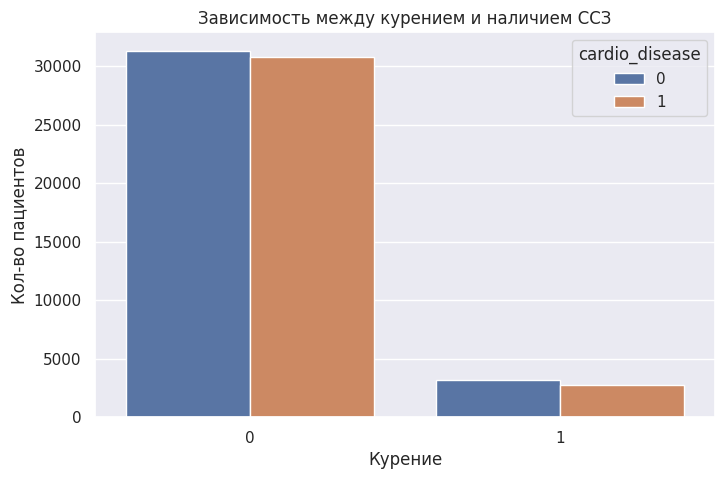

In [ ]:
sns.countplot(x='smoke', hue='cardio_disease', data=df)
plt.title('Зависимость между курением и наличием ССЗ')
plt.xlabel('Курение')
plt.ylabel('Кол-во пациентов')
plt.show()

Среди некурящих пациентов было обнаружено более чем в 10 раз больше случаев ССЗ

Text(0, 0.5, 'Давление')

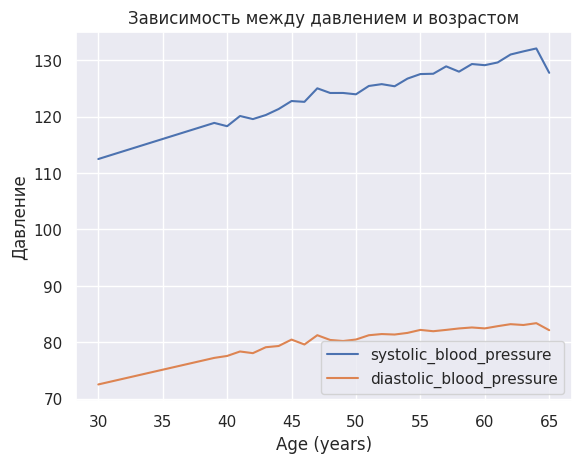

In [ ]:
df.groupby('age')[["systolic_blood_pressure", "diastolic_blood_pressure"]].mean().plot()
plt.title("Зависимость между давлением и возрастом")
plt.xlabel("Age (years)")
plt.ylabel("Давление")

В целом наблюдается увеличение систолического и диастолического давлений с возрастом

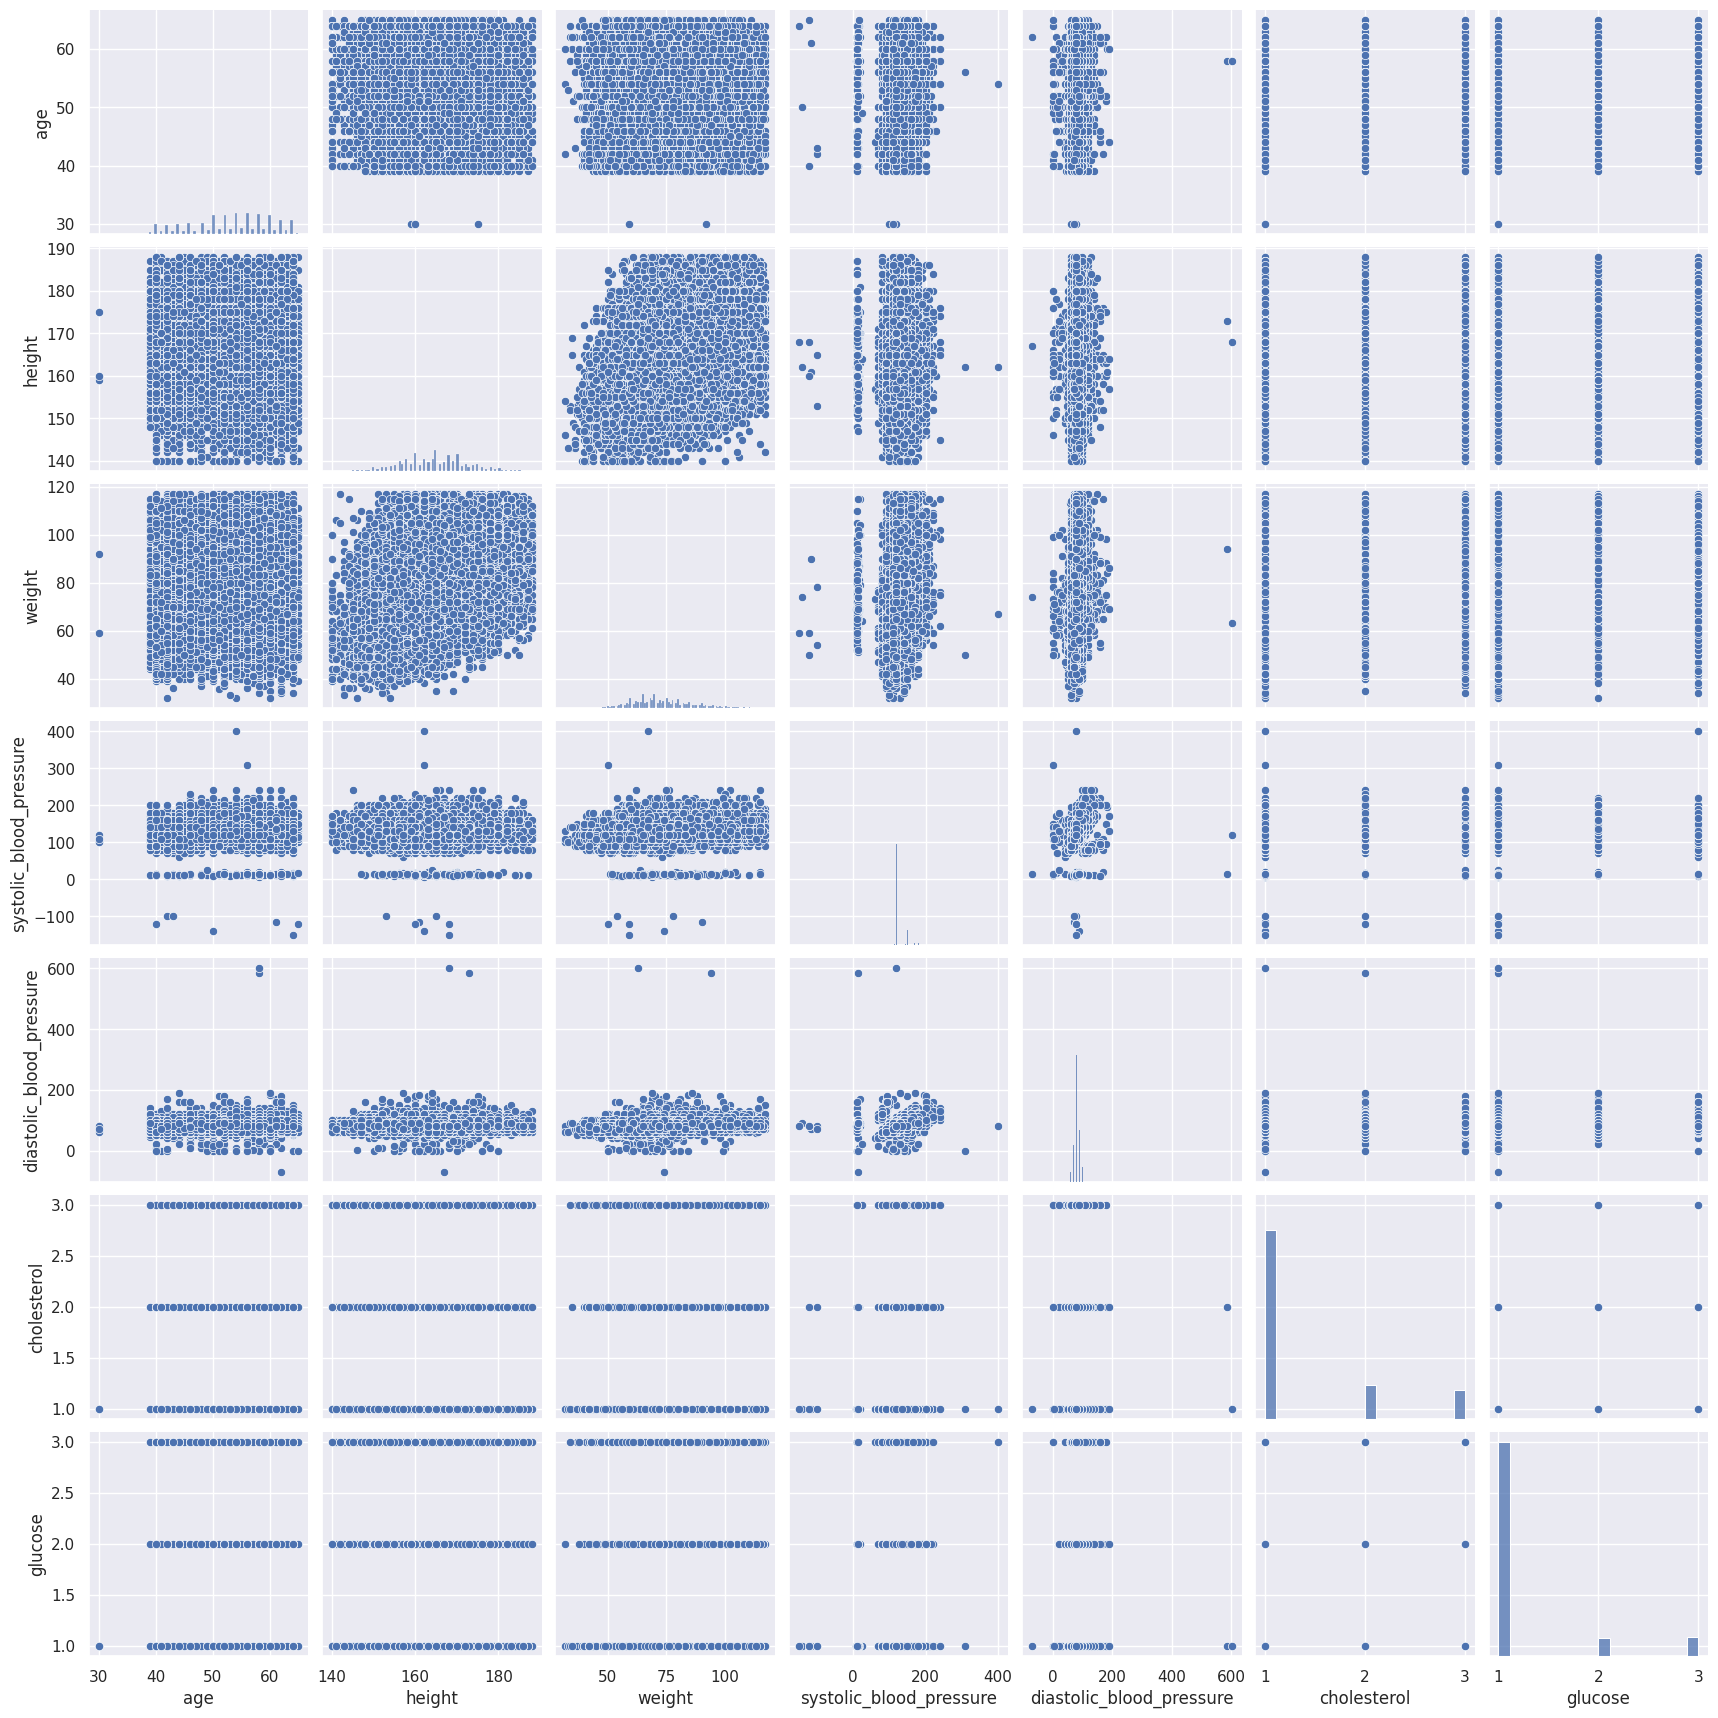

In [ ]:
numeric = ['age', 'height', 'weight', 'systolic_blood_pressure', 'diastolic_blood_pressure', 'cholesterol', 'glucose']
sns.pairplot(df[numeric])

<Axes: >

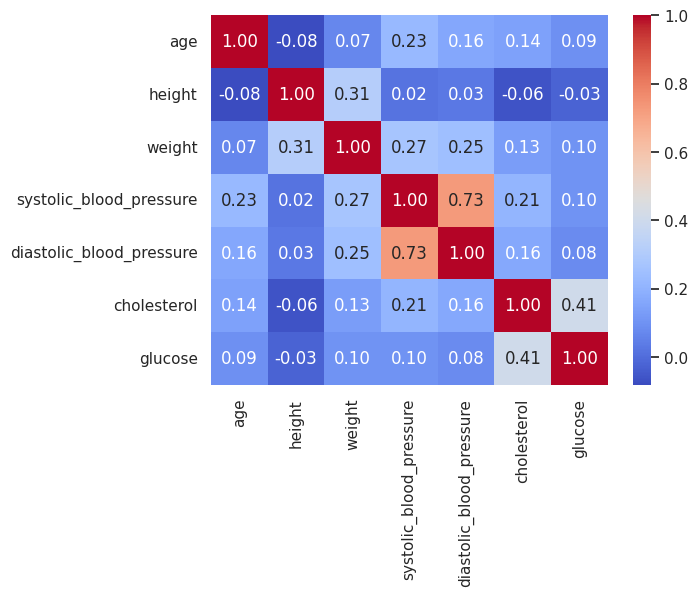

In [ ]:
sns.heatmap(df[numeric].corr(method='spearman'), annot=True, fmt=".2f", cmap = 'coolwarm')

Наибольшая корреляция между систолическим и диастолическим давлениями;
достаточно высокая корреляция между ростом и весом;
небольшая корреляция между холестерином и глюкозой;
большая степень связи между весом и давлением, чем ростом и давлением.

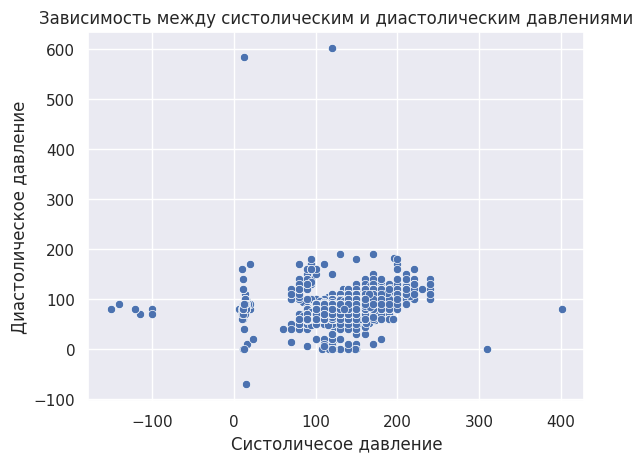

In [ ]:
sns.scatterplot(x='systolic_blood_pressure', y ='diastolic_blood_pressure', data=df)
plt.title('Зависимость между систолическим и диастолическим давлениями')
plt.xlabel('Систоличесое давление')
plt.ylabel('Диастолическое давление')
plt.show()

Установлена довольно сильная корреляция между систолическим и диастолическим давлениями

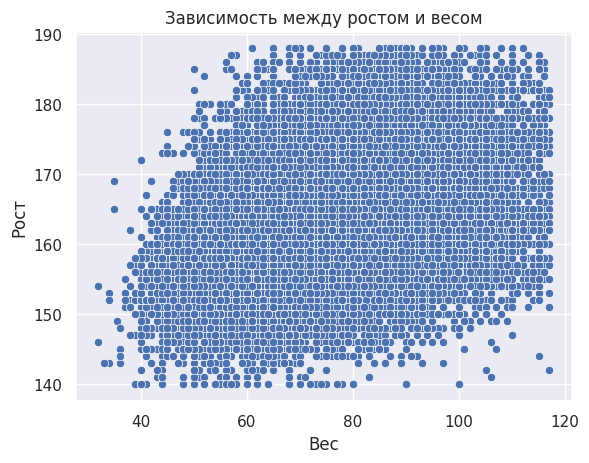

In [ ]:
sns.scatterplot(x='weight', y ='height', data=df)
plt.title('Зависимость между ростом и весом')
plt.xlabel('Вес')
plt.ylabel('Рост')
plt.show()

Установлена небольшая положительная корреляция между ростом и весом

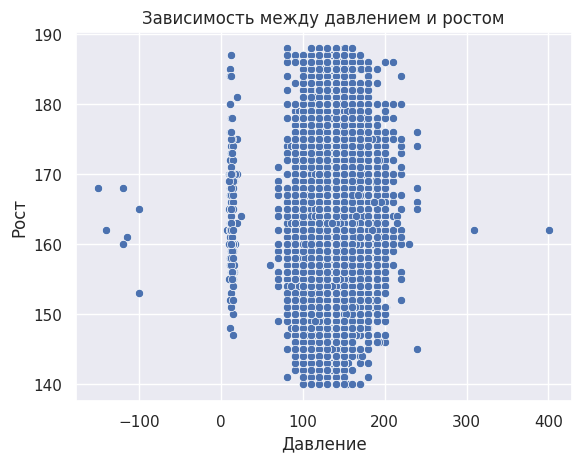

In [ ]:
sns.scatterplot(x = 'systolic_blood_pressure', y = 'height', data=df)
plt.title('Зависимость между давлением и ростом')
plt.xlabel('Давление')
plt.ylabel('Рост')
plt.show()

Зависимость между давлением и ростом  - незначительная

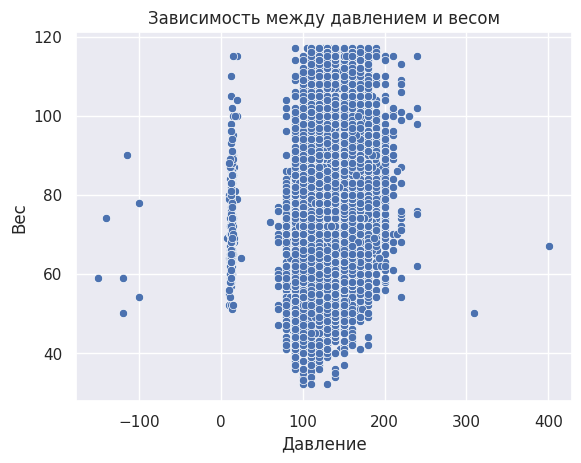

In [ ]:
sns.scatterplot(x='systolic_blood_pressure', y ='weight', data=df)
plt.title('Зависимость между давлением и весом')
plt.xlabel('Давление')
plt.ylabel('Вес')
plt.show()

Как иллюстрирует нижняя часть графика, имеется чуть более большая степень связи между весом и давлением, чем между ростом и давлением - у людей с меньшим весом давление ниже

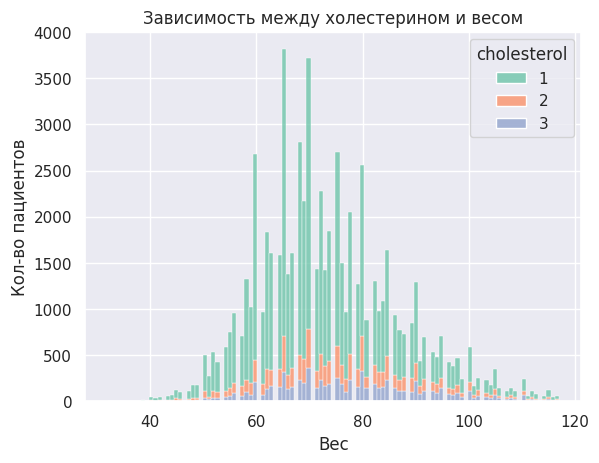

In [ ]:
sns.histplot(x='weight', hue ='cholesterol', data=df, palette="Set2", stat="count", multiple="stack")
plt.title('Зависимость между холестерином и весом')
plt.xlabel('Вес')
plt.ylabel('Кол-во пациентов')
plt.show()

Имеется слабая взаимосвязь между холестерином и весом - график имеет нормальное распределение,
т.е. число пациентов с разными уровнями холестерина распределено почти равномерно

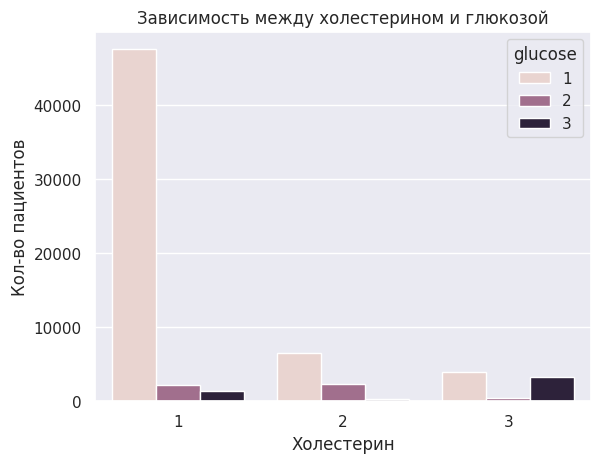

In [ ]:
sns.countplot(x='cholesterol', hue='glucose', data=df)
plt.title('Зависимость между холестерином и глюкозой')
plt.xlabel('Холестерин')
plt.ylabel('Кол-во пациентов')
plt.show()

Установлена небольшая положительная корреляция между уровнем холестерина и глюкозой.
Большинство исследованных пациентов имеет нормальный уровень холестерина и нормальный уровень глюкозы,
а среди пациентов с холестерином выше нормы, уровень глюкозы также выше нормы.
Но повышенный уровень глюкозы встречается одинаково часто среди пациентов с повышенным и нормальным значением глюкозы

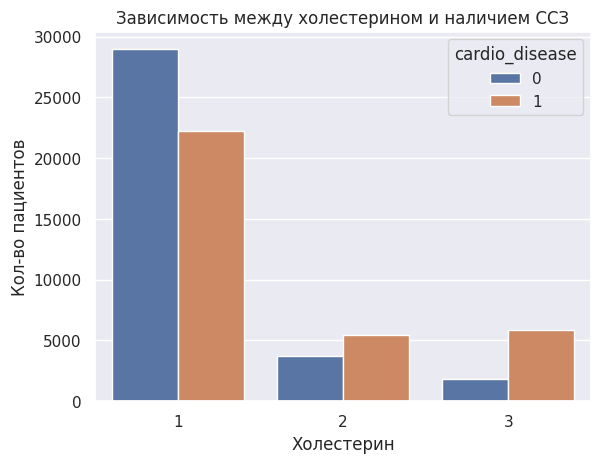

In [ ]:
sns.countplot(x='cholesterol', hue='cardio_disease', data=df)
plt.title('Зависимость между холестерином и наличием ССЗ')
plt.xlabel('Холестерин')
plt.ylabel('Кол-во пациентов')
plt.show()

Довольна слабая корреляция между уровнем холестерина и наличием ССЗ; среди пациентов с нормальным холестерином большее число случаев ССЗ,
однако примерно равное количество случаев ССЗ среди пациентов с повышенным и выше нормы холестерином

In [ ]:
pd.crosstab(df['glucose'], df['cardio_disease'])

cardio_disease,0,1
glucose,,
1,30499,27487
2,2056,2899
3,1968,3162


In [ ]:
corr, pval = spearmanr(df['glucose'], df['cardio_disease'])
print(corr,pval)

0.09089223867470117 8.07736526657912e-125


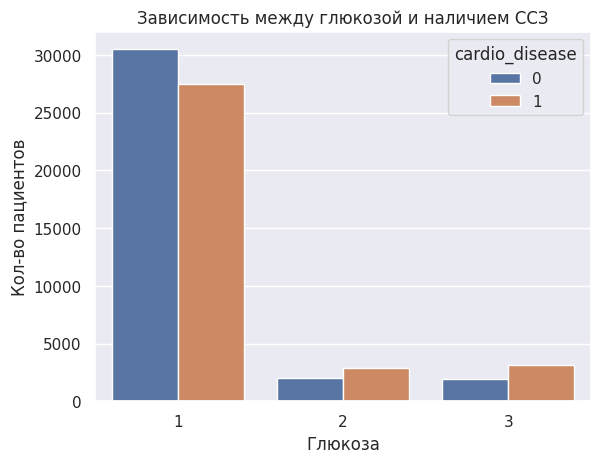

In [ ]:
sns.countplot(x='glucose', hue='cardio_disease', data=df)
plt.title('Зависимость между глюкозой и наличием ССЗ')
plt.xlabel('Глюкоза')
plt.ylabel('Кол-во пациентов')
plt.show()

Наибольшее количество случаев ССЗ наблюдается у пациентов с нормальным уровнем глюкозы, и чем выше уровень глюкозы, тем меньше случаев ССЗ

In [ ]:
pd.crosstab(df['smoke'], df['cardio_disease'])

cardio_disease,0,1
smoke,,
0,31348,30787
1,3175,2761


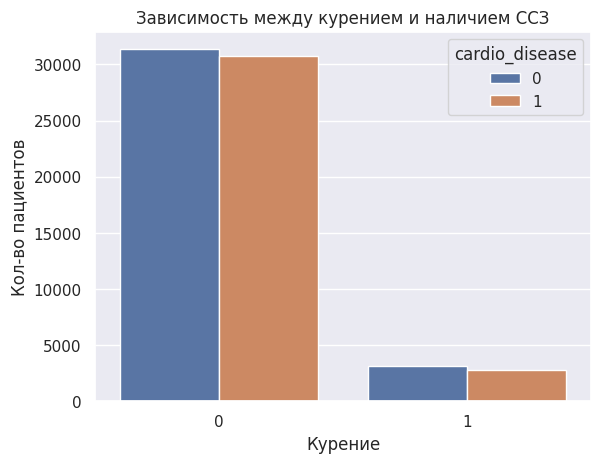

In [ ]:
sns.countplot(x='smoke', hue='cardio_disease', data=df)
plt.title('Зависимость между курением и наличием ССЗ')
plt.xlabel('Курение')
plt.ylabel('Кол-во пациентов')
plt.show()

 У курящих людей склонность с ССЗ ниже

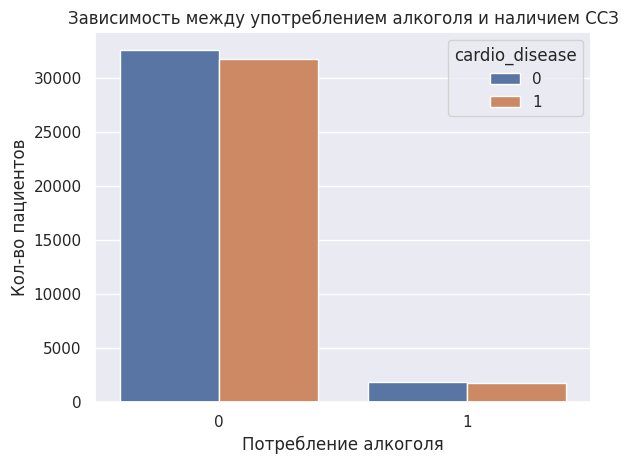

In [ ]:
sns.countplot(x='alcohol', hue='cardio_disease', data=df)
plt.title('Зависимость между употреблением алкоголя и наличием ССЗ')
plt.xlabel('Потребление алкоголя')
plt.ylabel('Кол-во пациентов')
plt.show()

Среди пациентов, употребляющих алкоголь, наблюдается в 20 раз меньше случаев ССЗ

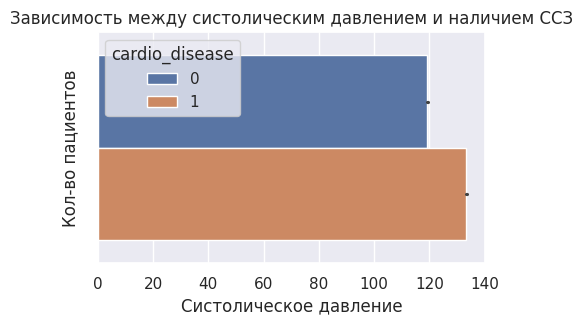

In [ ]:
plt.figure(figsize=(5, 3))
sns.barplot(x='systolic_blood_pressure', data=df, hue='cardio_disease')
plt.title('Зависимость между систолическим давлением и наличием ССЗ')
plt.xlabel('Систолическое давление')
plt.ylabel('Кол-во пациентов')
plt.show()

Довольно сильная прямая корреляция между систолическим давлением и ССЗ, т.е. у пациентов с ССЗ более высокое систолическое давление

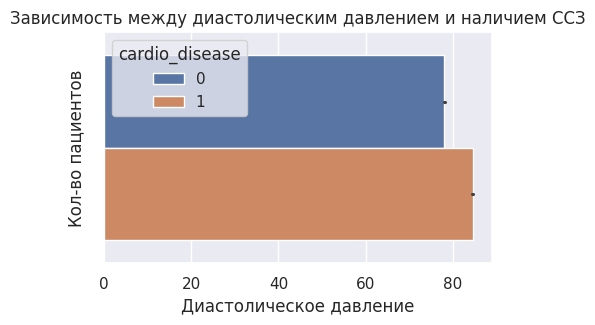

In [ ]:
plt.figure(figsize=(5, 3))
sns.barplot(x='diastolic_blood_pressure', data=df, hue='cardio_disease')
plt.title('Зависимость между диастолическим давлением и наличием ССЗ')
plt.xlabel('Диастолическое давление')
plt.ylabel('Кол-во пациентов')
plt.show()

Сильная корреляция между диастолическим давлением и ССЗ, но чуть менее сильная, чем между систолическим давлением и ССЗ,  т.е. у пациентов с ССЗ более высокое диастолическое давление

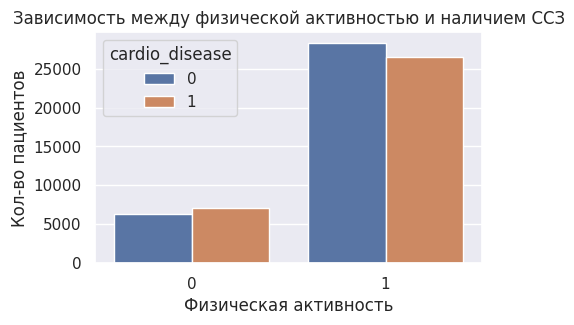

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(x='physically_active', data=df, hue='cardio_disease')
plt.title('Зависимость между физической активностью и наличием ССЗ')
plt.xlabel('Физическая активность')
plt.ylabel('Кол-во пациентов')
plt.show()

Среди пациентов, занимающихся физической активностью, было выявлено почти в 4 раза больше случаев ССЗ

In [ ]:
pd.crosstab(df.smoke,df.cardio_disease)

cardio_disease,0,1
smoke,,
0,31348,30787
1,3175,2761


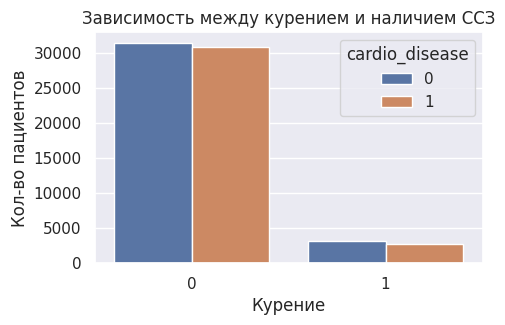

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(x='smoke', data=df, hue='cardio_disease')
plt.title('Зависимость между курением и наличием ССЗ')
plt.xlabel('Курение')
plt.ylabel('Кол-во пациентов')
plt.show()

Среди некурящих пациентов было обнаружено более чем в 10 раз больше случаев ССЗ

In [ ]:
pd.crosstab(df.alcohol,df.cardio_disease)

cardio_disease,0,1
alcohol,,
0,32624,31828
1,1899,1720


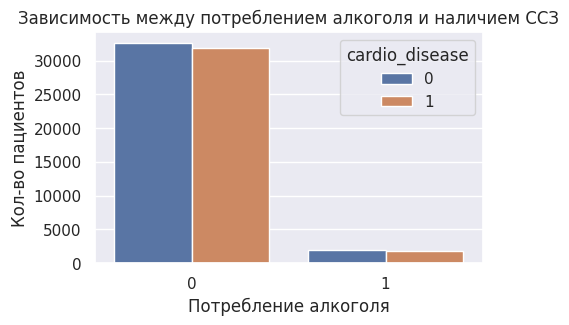

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(x='alcohol', data=df, hue='cardio_disease')
plt.title('Зависимость между потреблением алкоголя и наличием ССЗ')
plt.xlabel('Потребление алкоголя')
plt.ylabel('Кол-во пациентов')
plt.show()

Среди пациентов, употребляющих алкоголь, наблюдается в 20 раз меньше случаев ССЗ

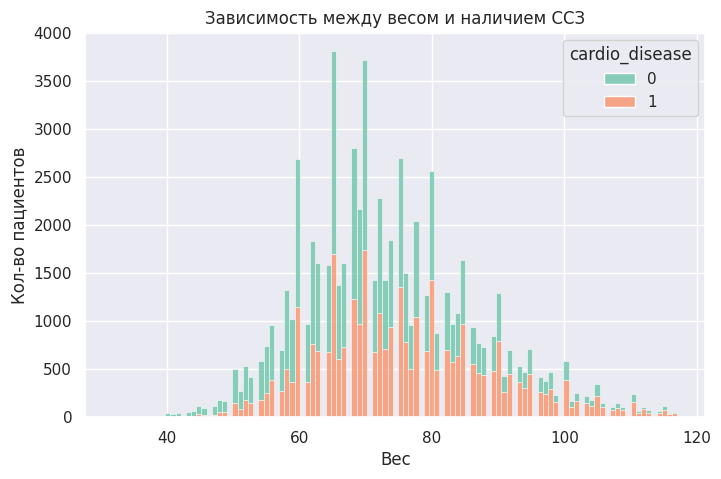

In [ ]:
sns.histplot(x='weight', hue ='cardio_disease', data=df, palette="Set2", stat="count", multiple="stack")
plt.title('Зависимость между весом и наличием ССЗ')
plt.xlabel('Вес')
plt.ylabel('Кол-во пациентов')
plt.show()

График имеет нормальное распределение, т.е. пациенты с ССЗ в целом распределены почти равномерно в разных весовых категориях

In [ ]:
df_model = pd.get_dummies(df, columns=['gender', 'age', 'smoke', 'alcohol', 'physically_active', 'cholesterol', 'glucose'])

In [ ]:
feature_cols = df_model.columns.drop('cardio_disease')
X = df_model[feature_cols]
y = df_model.cardio_disease

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=16)

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = lr.predict(X_train)
lr_accuracy_train = accuracy_score(y_train, y_pred)
print("Точность логистической регрессии:", lr_accuracy_train)

Точность логистической регрессии: 0.7201961216394888


In [ ]:
y_pred = lr.predict(X_test)
lr_accuracy_test = accuracy_score(y_test, y_pred)
print("Точность логистической регрессии:", lr_accuracy_test)

Точность логистической регрессии: 0.7221446933529195


In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[5373, 1560],
       [2223, 4459]])

Text(0.5, 427.9555555555555, 'Predicted label')

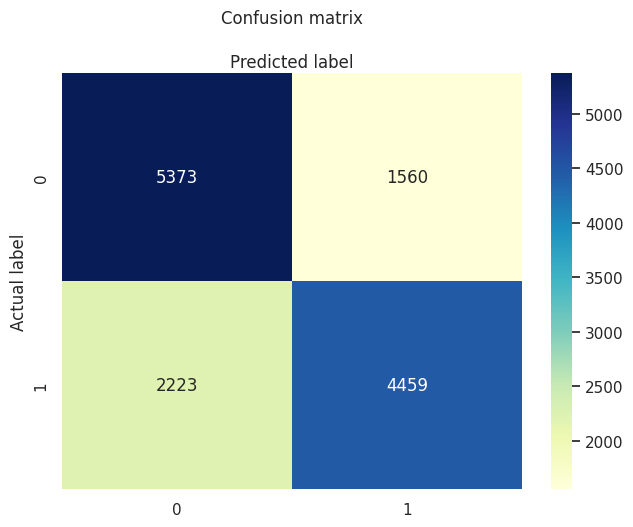

In [ ]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
target_names = ['without CVD', 'with CVD']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 without CVD       0.71      0.77      0.74      6933
    with CVD       0.74      0.67      0.70      6682

    accuracy                           0.72     13615
   macro avg       0.72      0.72      0.72     13615
weighted avg       0.72      0.72      0.72     13615



In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_train)
rf_accuracy = accuracy_score(y_train, y_pred)
print("Точность случайного леса:", rf_accuracy)

Точность случайного леса: 0.9762193330395181


In [ ]:
y_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
print("Точность случайного леса:", rf_accuracy)

Точность случайного леса: 0.6962174072713918


В ходе оценки были получены результаты, что точность модели по тренировочным и тестовым данным составляет чуть более 72% как показала модель логистической регрессии,
что говорит о работоспособности модели для данного исследования.  
Далее эффективность модели была оценена используя confusion matrix и визуализирована с помощью тепловой карты.
Также наряду с логистической регрессией была использована модель случайного леса, которая оценила точность модели по тренировочным в 97.6%, а по тестовым значениям в 69.8%.
Из чего делаем вывод, что в данном исследовании модель логистической регрессии более подходящая, так как она показала более стабильные результаты по сравнению со случайным лесом.

Выводы и рекомендации:

Основные зависимости, которые были выявлены:
Систолическое и диастолическое давление (прямая зависимость)
Систолическое давление и вес (прямая зависимость)
Диастолическое давление и вес (прямая зависимость)
Возраст и давление (прямая зависимость)

Неожиданными оказалось положительное влияние курения, алкоголя и отсутствие физической активности на индикатор ССЗ, а именно у пациентов,
которые курят, потребляют алкоголь и не занимаются физической активности, наблюдается в несколько раз меньше случаев ССЗ.

Для дальнейшего исследования основных причин для развития ССЗ, следует расширить базу пациентов, и добавить результаты анализов на алкоголь/курение вместо обычного анкетирования пациента. А также стоит добавить столбец с частотой курения и употребления алкоголя, чтобы понимать в какой зоне риска развития ССЗ находится пациент.